In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Building a simulator in 2D

In [2]:
# Perfect sensor
def sense(x):
    return x

### Euler integration

In [93]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

### Control policy - Rotated + Translated Ellipse

In [167]:
def control_ellipse(t, y):
    # General form of shape, with plugged in translation and major/minor axes
    # x = 4*cos(t) + 3
    # y = 2*sin(t) + 2
    # Apply general ellipse rotation form for 30 degrees, or pi/6 radians
    # x' = 4cos(t)cos(pi/6) - 2sin(t)sin(pi/6) + 3
    #    = 2sqrt(3)cos(t) - sin(t) + 3
    # y' = 4cos(t)sin(pi/6) + 2sin(t)cos(pi/6) + 2
    #    = 2cos(t) + sqrt(3)sin(t) + 2
    # Take derivative of above equations
    ux = -2*sqrt(3)*sin(t) - cos(t)
    uy = -2*sin(t) + sqrt(3)*cos(t)
    
    return array([ux, uy])

### Running the simulator

In [168]:
tf = 2*math.pi
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([6.5, 4.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control_ellipse(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

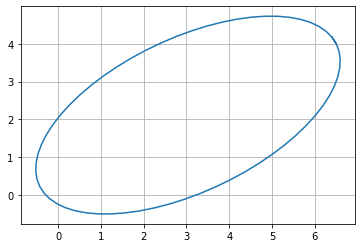

In [169]:
grid()
plot(x_log[:,0], x_log[:,1])

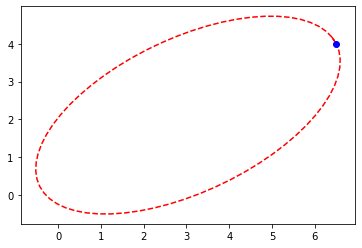

In [170]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

### Control Policy - Figure 8

In [175]:
def control_fig8(t, y):
    # General form of shape
    # x = cos(t) 
    # y = sin(t)*cos(t)
    # Apply rotational matrix with angle of 45 degrees, or pi/4 radians
    # x = 2*sqrt(2)*sin(t)*cos(t)**3
    # y = 2*sqrt(2)*cos(t)*sin(t)**3
    # Take derivative of above equations
    ux = 2*sqrt(2)*(cos(t)**2)*(cos(t)**2 - 3*sin(t)**2)
    uy = -2*sqrt(2)*(sin(t)**2)*(sin(t)**2 - 3*cos(t)**2)
    return array([ux, uy])

### Running the simulator

In [176]:
tf = 4*math.pi
Δt = 0.1   # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control_fig8(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

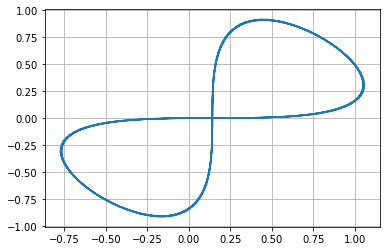

In [177]:
grid()
plot(x_log[:,0], x_log[:,1])

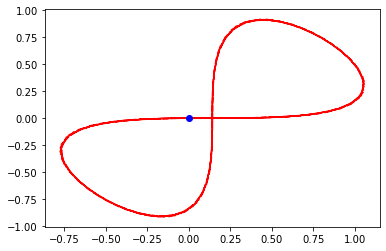

In [178]:
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())